In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [2]:
image_names = list(os.walk('./classify docs.v1i.multiclass/test/'))[0][2]

In [3]:
len(image_names)

247

In [4]:
df = pd.read_csv('./classify docs.v1i.multiclass/test_classes.csv')

In [5]:
df.head()

,filename,Aadhar,Pan,Unlabeled
0,766ad22cd5a05c1a9d21c658bb1e925c_jpg.rf.0e25ee...,1,0,0
1,b8d5cfe2-photo_8_2023-07-14_15-46-19_jpg.rf.0a...,0,1,0
2,49_jpg.rf.0675dd4cbdac4428c5d8b0cbe2cb6dc7.jpg,1,0,0
3,d637fe3f-imgtopdf_generated_2508201310016_page...,0,1,0
4,06637104-5875f38a9ecee3a41d6467d2_pan_jpg.rf.0...,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    247 non-null    object
 1    Aadhar     247 non-null    int64 
 2    Pan        247 non-null    int64 
 3    Unlabeled  247 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
aadhar_index = np.where(df[' Aadhar'] == 1)[0].tolist()
pan_index = np.where(df[' Pan'] == 1)[0].tolist()
df = df.iloc[aadhar_index+pan_index]
df = df.reset_index(drop=True)

In [8]:
X_test= []
y_test = []

for i in range(len(df)):
    
    img = np.array(Image.open(f"./classify docs.v1i.multiclass/test/{df.iloc[i]['filename']}"))
    if img is not None:
        img = cv2.resize(img,(128,128))
        if(img.shape == (128,128,3)):
            X_test.append(img)
            if(df.iloc[i][' Aadhar']):
                y_test.append(0)
            elif(df.iloc[i][' Pan']):
                y_test.append(1)

In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
X_test.shape, y_test.shape

((149, 128, 128, 3), (149,))

0


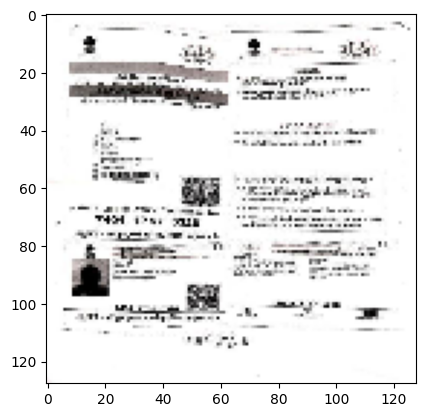

In [11]:
print(y_test[10])
plt.imshow(X_test[10])

In [12]:
np.save('./x_test.npy',X_test)
np.save("./y_test.npy",y_test)